# Investigate default simulations for wilting point, field capacity and saturated soil moisture content

Inne Vanderkelen - October 2023

## 1. Settings

In [10]:
# laod modules 
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
import regionmask 

# import own utils module
from iv_utils_daint import *
from ctsm_py.utils import * #info on ctsm utils: https://github .com/NCAR/ctsm_python_gallery 

# do plotting settings
set_plot_param()

# ignore all runtime warnings
warnings.filterwarnings('ignore')

In [11]:
# directory settings

# set directories
outdir = '/scratch/snx3000/ivanderk/'
outdir = '/project/s1207/ivanderk/scratch/'

figdir = '/users/ivanderk/notebooks_4p1000/figures/'

outdir = '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/innev/4p1000/'
figdir = '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/innev/4p1000/Vanderkelen_etal_2025_BG/figures/'
datadir = '/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/innev/4p1000/Vanderkelen_etal_2025_data_topublish/'

# Define directory where processing is done 
procdir =  outdir + 'processing_4p1000/' 

# go to processing directory 
os.chdir(procdir)

In [12]:
# case settings

# define scenario
scenario = 'high'

# case settings
case_ctl = 'IHistClm51Sp.hcru_hcru_mt13.pftsoilcol.CTL.spunup5'
case_scen = 'IHistClm51Sp.hcru_hcru_mt13.pftsoilcol.'+scenario+'.spunup5'


case   = case_ctl
block  = 'lnd' 
stream = 'h0' 

# List of variables to import from file(s) in $indir matching $pattern.
variables = ["H2OSOI", "watsat", "watfc"]

# discard 2004 until 2008 as spin up years
start_year, end_year = 1995, 2014 # 2028 

time_slice = slice(str(start_year)+"-01-01", str(end_year)+"-12-01")

proj =  ccrs.Robinson()


## 2. Load data

### Load simulations

In [13]:
ds_ctl = import_case(case_ctl, myVars=variables, timeSlice=time_slice)

ds_scen = import_case(case_scen, myVars=variables, timeSlice=time_slice)

ds_delta = ds_scen - ds_ctl 

### Load auxiliary data (soil levels, input dataset, wilting point etc) 

In [14]:
# info on soil levels
# manually get soil level info from CLM
levsoi_thickness, levsoi_depth, levgrnd_thickness , levgrnd_depth = get_soildepths()

# get info on soil levels
levsoi = ds_ctl['levsoi'].values
levgrnd = ds_ctl['levgrnd'].values # all soil layers (deepest 5 layers are for thermodynamical calculations)

# input data
# define variables to load from input dataset
input_variables = ['ORGANIC','PFTDATA_MASK','PCT_SAND','PCT_CLAY']
case_ctl_forinputdata = 'IHistClm51Sp.hcru_hcru_mt13.pftsoilcol.CTL.spunup5'

# load inputdata
ds_input, ds_input_scen, landmask = load_inputdata(scenario, input_variables, case_ctl_forinputdata)

# wilting point
# load precalculated wilting point datasets
da_wilting_h2osoi, da_wilting_h2osoi_scen = load_wilting_h2osoi(scenario) 

### Plotting settings

In [6]:
## settings

# get mask and region ids
exclude_ids = np.array([0,1,2,16,28,29,30,31])
mask_regions = regionmask.defined_regions.ar6.land.mask(ds_ctl['H2OSOI'])

region_ids = np.arange(0,44)
region_ids = np.delete(region_ids, exclude_ids)

plotting_depth = 2 # m 8
figsize = (17,38)
labels = ['a.','b.','c.','d.','e.','f.','g.']

In [18]:
da_fc_ctl

,Array,Chunk
Bytes,2.31 GiB,9.89 MiB
Shape,"(239, 10, 360, 720)","(1, 10, 360, 720)"
Count,2151 Tasks,239 Chunks
Type,float32,numpy.ndarray


## 3. Analysis & plotting

In [24]:
da_wilting_h2osoi_scen

<xarray.DataArray 'H2OSOI_WILT' (levsoi: 10, lat: 360, lon: 720)>
[2592000 values with dtype=float64]
Coordinates:
  * levsoi   (levsoi) int32 0 1 2 3 4 5 6 7 8 9
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8

In [23]:
da_fc_scen

<xarray.DataArray 'watfc' (time: 239, levsoi: 10, lat: 360, lon: 720)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * levsoi   (levsoi) float32 0.01 0.04 0.09 0.16 0.26 0.4 0.58 0.8 1.06 1.36
  * time     (time) object 1995-02-01 00:00:00 ... 2014-12-01 00:00:00
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Attributes:
    long_name:      water field capacity
    units:          m^3/m^3
    cell_methods:   time: mean
    landunit_mask:  unknown

In [22]:
da_fc_scen.load() - da_wilting_h2osoi_scen


IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

In [19]:
# calculate difference in water holding capacity. 

# delta field capacity
da_fc_ctl =  ds_ctl['watfc'][:,0:10,:,:].rename({'levgrnd':'levsoi'}).load()
da_fc_scen =  ds_scen['watfc'][:,0:10,:,:].rename({'levgrnd':'levsoi'}).load()


da_whc_ctl =  (da_fc_ctl - da_wilting_h2osoi)
da_whc_scen = (da_fc_scen  - da_wilting_h2osoi_scen)

# delta wilting point
da_delta_whc =  da_whc_scen - da_whc_ctl
da_delta_whc_rel = (da_delta_whc/abs(da_whc_ctl)*100).weighted(da_delta_whc['levsoi']).mean(dim='levsoi').mean('time').compute()


IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

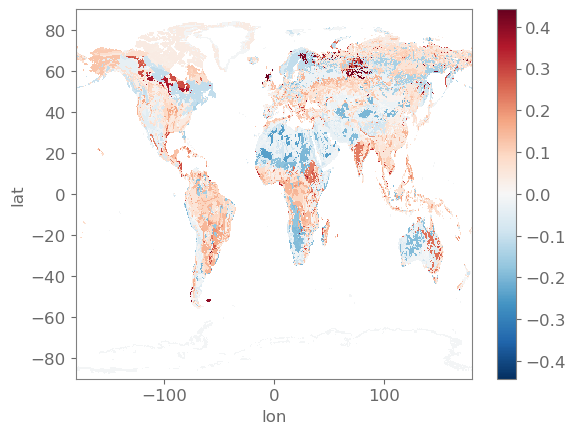

In [ ]:
da_whc_ctl.weighted(da_delta_whc['levsoi']).mean(dim='levsoi').mean('time').plot()

In [ ]:
# calculate saturated fraction
da_h2o_ctl  =  ds_ctl['H2OSOI'][:,0:10,:,:]
da_h2o_scen =  ds_scen['H2OSOI'][:,0:10,:,:]

da_delta_h2o = da_h2o_scen - da_h2o_ctl
da_delta_h2o_rel =  ((da_delta_h2o / abs(da_h2o_ctl)).weighted(da_delta_h2o['levsoi']).mean(dim='levsoi').mean('time')*100).compute()

# water content at saturation
da_sat_ctl =  ds_ctl['watsat'][:,0:10,:,:].rename({'levgrnd':'levsoi'})
da_sat_scen =  ds_scen['watsat'][:,0:10,:,:].rename({'levgrnd':'levsoi'})

da_satfrac_ctl = da_h2o_ctl/da_sat_ctl
da_satfrac_scen = da_h2o_scen/da_sat_scen

da_delta_satfrac =  (da_satfrac_scen - da_satfrac_ctl)
da_delta_satfrac_rel =  ((da_delta_satfrac / abs(da_satfrac_ctl)).weighted(da_delta_satfrac['levsoi']).mean(dim='levsoi').mean('time')*100).compute()


da_delta_sat = da_sat_scen - da_sat_ctl 
da_delta_sat_rel =  ((da_delta_sat / abs(da_sat_ctl)).weighted(da_delta_sat['levsoi']).mean(dim='levsoi').mean('time')*100).compute()


da_whcsat_ctl =  (da_sat_ctl - da_wilting_h2osoi)
da_sat_scen['lat'] = da_wilting_h2osoi_scen.lat
da_wilting_h2osoi_scen['levsoi'] = da_sat_ctl.levsoi

da_whcsat_scen = (da_sat_scen.compute() - da_wilting_h2osoi_scen)

da_delta_whcsat =  da_whcsat_scen - da_whcsat_ctl
da_delta_whcsat = da_delta_whcsat.weighted(da_delta_whcsat['levsoi']).mean(dim='levsoi')
da_whcsat_ctl= da_whcsat_ctl.weighted(da_whcsat_ctl['levsoi']).mean(dim='levsoi')

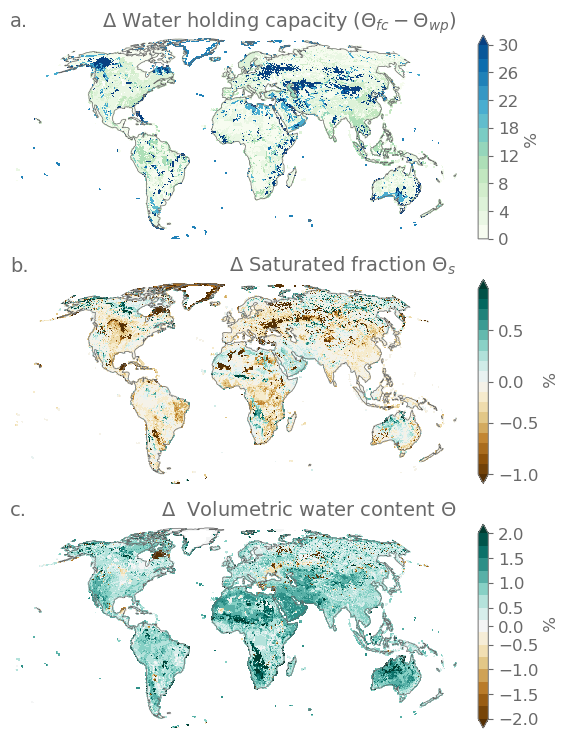

In [ ]:
vlims=[-10,10]

fig, axes = plt.subplots(3,1, figsize = (7,9) ,subplot_kw={'projection': proj, 'frameon':False})
axes = axes.flatten()

# delta water content
ax = axes[0]
label = labels[0]
da_toplot = da_delta_whc_rel
title = '$\Delta$ Water holding capacity ($\Theta_{fc} - \Theta_{wp}$)'
levels = np.arange(-20,22.5,2.5)
levels = np.arange(0,32,2)
levels = np.concatenate((levels[:int((len(levels)-1)/2)], levels[int((len(levels)-1)/2)+1:]))

da_toplot.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='GnBu', extend='max',  levels=levels,  cbar_kwargs={'label':' %', 'fraction': 0.02, 'pad': 0.04}, add_labels=False)
ax.set_title(title, loc='right')
ax.set_title(label, loc='left')
ax.coastlines(color='dimgray', linewidth=0.5)
ax.set_extent([-180,180,-63,90], crs=ccrs.PlateCarree())
ax.axis('off')


# delta saturated water content
ax = axes[1]
label = labels[1]
da_toplot = da_delta_satfrac_rel
title = '$\Delta$ Saturated fraction $\Theta_{s}$ '
levels = np.arange(-1.5,1.75,0.25)
levels = np.arange(-1,1.,0.1)

#levels = np.arange(-2,2.25,0.25)
levels = np.concatenate((levels[:int((len(levels)-1)/2)], levels[int((len(levels)-1)/2)+1:]))
ticks = np.arange(-1,1.1,0.5)

da_toplot.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='BrBG', extend='both',  levels=levels,  cbar_kwargs={'label':' %', 'fraction': 0.02, 'pad': 0.04, 'ticks' : ticks}, add_labels=False)
ax.set_title(title, loc='right')
ax.set_title(label, loc='left')
ax.coastlines(color='dimgray', linewidth=0.5)
ax.set_extent([-180,180,-63,90], crs=ccrs.PlateCarree())
ax.axis('off')


ax = axes[2]
label = labels[2]
da_toplot = da_delta_h2o_rel
title = '$\Delta$  Volumetric water content $\Theta$'
levels = np.arange(-1,1.1,0.1)
levels = np.arange(-2,2.25,0.25)
levels = np.concatenate((levels[:int((len(levels)-1)/2)], levels[int((len(levels)-1)/2)+1:]))
ticks = np.arange(-2,2.25,0.5)

da_toplot.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='BrBG', extend='both',  levels=levels,  cbar_kwargs={'label':' %', 'fraction': 0.02, 'pad': 0.04, 'ticks' : ticks}, add_labels=False)
ax.set_title(title, loc='right')
ax.set_title(label, loc='left')

ax.coastlines(color='dimgray', linewidth=0.5)
ax.set_extent([-180,180,-63,90], crs=ccrs.PlateCarree())
ax.axis('off')


fig.tight_layout()
fig.savefig(figdir+'waterholdingcapacity.png')

In [ ]:
da_delta_whc_rel.mean(dim=('lat','lon'))

<xarray.DataArray ()>
array(13.27672393)

In [ ]:
da_delta_satfrac_rel.mean(dim=('lat','lon'))

<xarray.DataArray ()>
array(-0.2292448, dtype=float32)

In [ ]:
da_delta_h2o_rel.mean(dim=('lat','lon'))

<xarray.DataArray 'H2OSOI' ()>
array(0.6657322, dtype=float32)

In [ ]:
da_delta_fc = (da_fc_scen - da_fc_ctl)
da_delta_fc_rel = (da_delta_fc/abs(da_fc_ctl)).weighted(da_delta_fc['levsoi']).mean(dim='levsoi').mean('time')*100

da_delta_wp = (da_wilting_h2osoi - da_wilting_h2osoi_scen)
da_delta_wp_rel = (da_delta_wp/abs(da_wilting_h2osoi)).weighted(da_wilting_h2osoi_scen['levsoi']).mean(dim='levsoi')*100

## Relative 

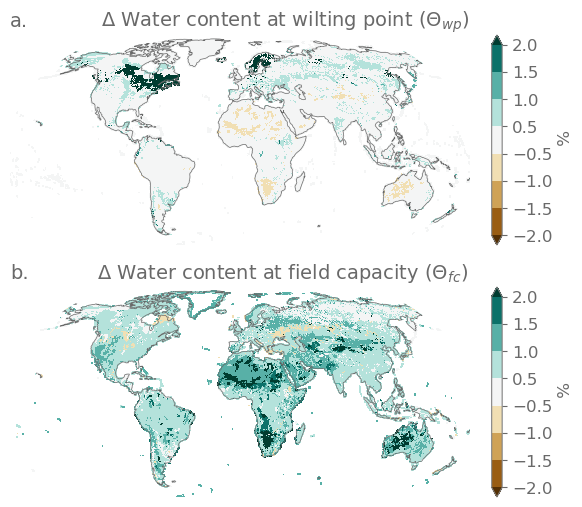

In [ ]:
vlims=[-10,10]

fig, axes = plt.subplots(2,1, figsize = (7,6) ,subplot_kw={'projection': proj, 'frameon':False})
axes = axes.flatten()

# delta water content
ax = axes[0]
label = labels[0]
da_toplot = da_delta_wp_rel
title = '$\Delta$ Water content at wilting point ($\Theta_{wp}$)'
levels = np.arange(-2,2.5,0.5)
levels = np.concatenate((levels[:int((len(levels)-1)/2)], levels[int((len(levels)-1)/2)+1:]))

da_toplot.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='BrBG', extend='both',  levels=levels,   cbar_kwargs={'label':' %', 'fraction': 0.02, 'pad': 0.04}, add_labels=False)
ax.set_title(title, loc='right')
ax.set_title(label, loc='left')
ax.coastlines(color='dimgray', linewidth=0.5)
ax.set_extent([-180,180,-63,90], crs=ccrs.PlateCarree())
ax.axis('off')


# delta saturated water content
ax = axes[1]
label = labels[1]
da_toplot = da_delta_fc_rel
title = '$\Delta$ Water content at field capacity ($\Theta_{fc}$) '
levels = np.arange(-3,3.5,0.5)
levels = np.arange(-2,2.5,0.5)
levels = np.concatenate((levels[:int((len(levels)-1)/2)], levels[int((len(levels)-1)/2)+1:]))

da_toplot.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='BrBG', extend='both',  levels=levels, cbar_kwargs={'label':' %', 'fraction': 0.02, 'pad': 0.04}, add_labels=False)
ax.set_title(title, loc='right')
ax.set_title(label, loc='left')
ax.coastlines(color='dimgray', linewidth=0.5)
ax.set_extent([-180,180,-63,90], crs=ccrs.PlateCarree())
ax.axis('off')


fig.tight_layout()
fig.savefig(figdir+'wilting_point_field_capacity.png')

## absolute

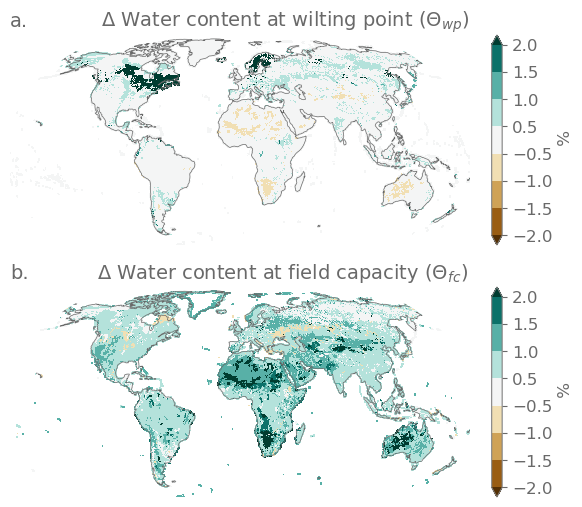

In [ ]:
vlims=[-10,10]

fig, axes = plt.subplots(2,1, figsize = (7,6) ,subplot_kw={'projection': proj, 'frameon':False})
axes = axes.flatten()

# delta water content
ax = axes[0]
label = labels[0]
da_toplot = da_delta_wp
title = '$\Delta$ Water content at wilting point ($\Theta_{wp}$)'
levels = np.arange(-2,2.5,0.5)
levels = np.concatenate((levels[:int((len(levels)-1)/2)], levels[int((len(levels)-1)/2)+1:]))
# levels=levels,
da_toplot.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='BrBG', extend='both',    cbar_kwargs={'label':' %', 'fraction': 0.02, 'pad': 0.04}, add_labels=False)
ax.set_title(title, loc='right')
ax.set_title(label, loc='left')
ax.coastlines(color='dimgray', linewidth=0.5)
ax.set_extent([-180,180,-63,90], crs=ccrs.PlateCarree())
ax.axis('off')


# delta saturated water content
ax = axes[1]
label = labels[1]
da_toplot = da_delta_fc
title = '$\Delta$ Water content at field capacity ($\Theta_{fc}$) '
levels = np.arange(-3,3.5,0.5)
levels = np.arange(-2,2.5,0.5)
levels = np.concatenate((levels[:int((len(levels)-1)/2)], levels[int((len(levels)-1)/2)+1:]))
# levels=levels, 
da_toplot.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='BrBG', extend='both', cbar_kwargs={'label':' %', 'fraction': 0.02, 'pad': 0.04}, add_labels=False)
ax.set_title(title, loc='right')
ax.set_title(label, loc='left')
ax.coastlines(color='dimgray', linewidth=0.5)
ax.set_extent([-180,180,-63,90], crs=ccrs.PlateCarree())
ax.axis('off')


fig.tight_layout()
fig.savefig(figdir+'wilting_point_field_capacity.png')